# Connecting to Hardware

**SUMMARY**: *In this lab, you'll learn how to setup and connect to your ChipWhisperer hardware. We'll also cover how to build firmware for your target microcontroller, how to capture power traces, and how to communicate with target devices.*

**LEARNING OUTCOMES:**
* Setting up your ChipWhisperer Hardware
* Using the ChipWhisperer Python API to connect to your hardware
* Communication with the target
* Capturing a power trace

## Prerequisites

Hold up - before continuing, ensure you have done the following:

* ☑ Validated your setup using the [ChipWhisperer Setup Test](./ChipWhisperer%20Setup%20Test.ipynb) notebook.
* ☑ Run through the Jupyter introduction.

## Physical Setup

### ChipWhisperer-Nano

The ChipWhisperer-Nano is a single-board device. It includes the capture hardware, along with a built in STM32F0 target. To use this target, simply plug in the device, then go get a drink to reward yourself:

<img src="img/cwnano.jpg" alt="CW-Nano Plugged In" width=400>

For the tutorials, you should use `PLATFORM='CWNANO'`.

## Connecting to ChipWhisperer NANO

Now that your hardware is all setup, we can now learn how to connect to it.

In this board, we have two programable chips, one is the 'Scope' to the left of the image and the other is the 'Target', to the right of the image.
From Jupyter, the Scope is controlled by the `scope` object, while the Target is controlled by the `target` object.

##### Conneting to the Scope
We can connect to the ChipWhisperer with:

In [373]:
import chipwhisperer as cw
scope = cw.scope()

Hopefully, this command does not return any errors. If it does, please review the Common Issues section of the Assignment.

By default, ChipWhisperer will try to autodetect the type of device your're running. There are many Scope boards by ChipWhisperer, but in our case, we use the the CWNano. See API documentation for manually specifying the scope type.
We can verify that the connection actually happened, and see the scope initialized parameters as follows.

In [374]:
%whos
scope

Variable                           Type            Data/Info
------------------------------------------------------------
R                                  int             51
capture_trace                      function        <function capture_trace at 0x0000022DB749B5B0>
ciphertext                         bytearray       bytearray(b'U\x03\x9d\xdb<...>^+\x07\xb0\xce\x1dR\xab')
cumulative_power_consumption       ndarray         5000000: 5000000 elems, type `float64`, 40000000 bytes (38.14697265625 Mb)
cumulative_power_consumption_dec   ndarray         5000000: 5000000 elems, type `float64`, 40000000 bytes (38.14697265625 Mb)
cw                                 module          <module 'chipwhisperer' f<...>pwhisperer\\__init__.py'>
decryption_traces                  list            n=100
dt                                 float           0.001
encryption_traces                  list            n=100
i                                  int             0
msg                                b

ChipWhisperer Nano Device
fw_version = 
    major = 0
    minor = 65
    debug = 0
io = 
    tio1         = None
    tio2         = None
    tio3         = None
    tio4         = high_z
    pdid         = True
    pdic         = False
    nrst         = True
    clkout       = 7500000.0
    cdc_settings = bytearray(b'\x01\x00\x00\x00')
adc = 
    clk_src  = int
    clk_freq = 7500000.0
    samples  = 50000
glitch = 
    repeat     = 0
    ext_offset = 0

The first command `%whos` display all the variables in the current notebook. In our case, it should display:

Variable   Type      Data/Info

cw         module    <module 'chipwhisperer' f<...>pwhisperer\\init.py'>

scope      CWNano    ChipWhisperer Nano Device<...>= 0\n    ext_offset = 0\n

The second command will display the parameters of the `scope` object. Here we should see the firmware version, the `io` pins of the Scope chip that control the Target chip, the ADC settings and the Glitch settings.

Some sane default settings can be set using:

In [375]:
scope.default_setup()
scope

ChipWhisperer Nano Device
fw_version = 
    major = 0
    minor = 65
    debug = 0
io = 
    tio1         = None
    tio2         = None
    tio3         = None
    tio4         = high_z
    pdid         = True
    pdic         = False
    nrst         = True
    clkout       = 7500000.0
    cdc_settings = bytearray(b'\x01\x00\x00\x00')
adc = 
    clk_src  = int
    clk_freq = 7500000.0
    samples  = 5000
glitch = 
    repeat     = 0
    ext_offset = 0

Sets up sane capture defaults for this scope. 
You can check these settings by putting the cursor anywhere in the default_setup() and hitting shift+tab, then the + sign at the top right corner of the pop up window.

  * 7.5MHz ADC clock
  * 7.5MHz output clock, which means that both the ADC and target will be running at the same clock frequency, allowing us to get one sample per clock.
  * 5000 capture samples
  * tio1 = serial rx
  * tio2 = serial tx
  * glitch module off

File:      c:\users\mtaha\chipwhisperer5_64\cw\home\portable\chipwhisperer\software\chipwhisperer\capture\scopes\cwnano.py

You can change any of these settings by directly assigning a value to the parameter. Here, we change the number of samples to the maximum of 50,000 samples. The specifications can be found in https://rtfm.newae.com/Capture/ChipWhisperer-Nano/

In [376]:
scope.adc.samples=50000
scope

ChipWhisperer Nano Device
fw_version = 
    major = 0
    minor = 65
    debug = 0
io = 
    tio1         = None
    tio2         = None
    tio3         = None
    tio4         = high_z
    pdid         = True
    pdic         = False
    nrst         = True
    clkout       = 7500000.0
    cdc_settings = bytearray(b'\x01\x00\x00\x00')
adc = 
    clk_src  = int
    clk_freq = 7500000.0
    samples  = 50000
glitch = 
    repeat     = 0
    ext_offset = 0

##### Connecting to the Target
Connecting to the target device to the previously initialized scope:

In [377]:
target = cw.target(scope)

Similarly, we can inspect the `target` object as follows:

In [378]:
target

SimpleSerial Settings =
	output_len             = 16
	baud                   = 38400
	simpleserial_last_read = 
	simpleserial_last_sent = 
	

It should show the output_len, the connection baud rate, and the connection protocol. The default connection protocol is the Simple Serial protocol.

And that's it! Your ChipWhisperer is now setup and ready to attack a target. 

Note that, the Scope chip is already programmed by the firmware. However the Target chip is still empty. Yes, we did specify the communication protocol between the Scope and the Target chip, but the Target is not yet running any code. Next, we will program the Target chip.

## Building and Uploading a Simple Target

The next step in attacking a target is to get some code built and uploaded onto it. 

Target codes must be built on the system's command line. Luckily, thanks to Jupyter, we can run a command within a notebook as follows. %%bash will run a command on the bash on behalf of Jupyter

In [379]:
%%bash
cd ../../hardware/victims/firmware/simpleserial-base/
make PLATFORM=CWNANO CRYPTO_TARGET=NONE

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
    simpleserial-base.c ...Done!
.
Compiling:
    .././simpleserial/simpleserial.c ...Done!
.
Compiling:
    .././hal/stm32f0_nano/stm32f0_hal_nano.c ...Done!
.
Compiling:
    .././hal/stm32f0/stm32f0_hal_lowlevel.c ...Done!
.
Assembling: .././hal/stm32f0/stm32f0_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m0 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWNANO/stm32f0_startup.lst -I.

Hopefully, you have the setup complete and the ARM compiler is correctly installed as part of the ChipWhesperer installation. If that is that case, the `make` command will build the code avaible in the directly specified to it. In our case, the Simple Serial Base folder in: cd ../hardware/victims/firmware/simpleserial-base/
It should report:

+ --------------------------------------------------------
+ Built for platform CWNANO Built-in Target (STM32F030) with:
+ CRYPTO_TARGET = NONE
+ CRYPTO_OPTIONS = AES128C
+ --------------------------------------------------------

and generate a hex file in the same folder above. The output above should also specify the generated hex file as
 Creating load file for Flash: simpleserial-base-CWNANO.hex"
 
 
Then, in order to upload the generated hex file, we use the cw.program_target while specifying the Scope which connects us to the Target, the programmer which in this case the STM32Programmer, and the path to the hex file.

In [380]:
cw.program_target(scope, cw.programmers.STM32FProgrammer, "../../hardware/victims/firmware/simpleserial-base/simpleserial-base-CWNANO.hex")

Detected known STMF32: STM32F04xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 7059 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 7059 bytes


This should upload the hex file to the Target.

Please navigate to the folder ../hardware/victims/firmware/simpleserial-base/ and check the simpleserial-base.c file that we just compiled

The main function initializes the platform, the uart, and the trigger setup. Then, it defines three SimpleSerial commands `p`, `k` and `x`. 
- `p` accepts 16 bytes then performs the `get_pt` function
- `k` accepts 16 bytes then performs the `get_key` function
- `x` accept no bytes, and directly performs a reset.

The `get_pt`, `get_key` and `reset` functions are also defined in the file, just above the main().
Then, it puts the Target into an infinite loop of `simpleserial_get();` waiting for any comming command.

Please also check the `simpleserial-base-CWNANO.hex` that we generated and check its `Last Modified` time.

Next we'll lear how to communicate with the target and how to capture power traces.

## Communication with the Target

Communication with targets, which is done through the `SimpleSerial target` object we got earlier, is grouped into two categories:

1. Raw serial via `target.read()`, `target.write()`, `target.flush()`, etc. 

1. SimpleSerial commands via `target.simpleserial_read()`, `target.simpleserial_write()`, `target.simpleserial_wait_ack()`, etc.

The firmware we uploaded uses the simpleserial protocol (https://wiki.newae.com/SimpleSerial), so we'll start off with simpleserial. Later, we'll use the raw serial commands to send the same messages.

If you check the simpleserial-base firmware (`simpleserial-base.c`) you'll find that for the simpleserial `'p'` command, the target will read 16 bytes and execute the `get_pt()` function to perform a quick `trigger_high();` and `trigger_low();` followed by echo back the data by `simpleserial_put('r', 16, pt);`, which sends a `r` letter, followed by the 16 bytes of `pt`. Please recheck the hardware/victims/firmware/simpleserial-base/simpleserial-base.c for confirmation. 
Let's try that out now:

In [381]:
msg = bytearray([0]*16) #simpleserial uses bytearrays
target.simpleserial_write('p', msg)

Let's check if we got a response:

In [382]:
print(target.simpleserial_read('r', 16))

bytearray(b'\x8e:n\xbdh\x83\xc3\x86Y\xa3\x01b\xfeB\xa6\xa8')


The `simpleserial_read('r', 16)` command performs a read of 17 bytes, and check if the first letter is indeed an `r` followed by 16 bytes of data.

Try sending different values, and check if you are getting the same values back.

In [383]:
msg = bytearray([11]*16) #simpleserial uses bytearrays
target.simpleserial_write('p', msg)
print(target.simpleserial_read('r', 16))

bytearray(b'\x851e\xb6c\x88\xc8\x8dFR>y\xa9\xae\x8e$')


Lets also try sending the `'k'` command, which expects 16 bytes but does not perform any action on the trigger pins and returns only the value 0x00. Please recheck the hardware/victims/firmware/simpleserial-base/simpleserial-base.c for confirmation.

In [384]:
target.simpleserial_write('k', bytearray([0]*16))

If we checked the return string, it will give us a warning (not an error).

In [385]:
print(target.simpleserial_read('r', 16))

(ChipWhisperer Target WARNING|File SimpleSerial.py:410) Unexpected start to command: 


None


It is just a warning. The command `k` does return one byte that is `0x00`. However, since this value is not the expected `r` of `simpleserial_read('r', 16)`, it issues a warning. It also says that there are no 16 bytes of data after the first letter, hence the print of `None`. You can read a single byte by the `wait_ack` function as follows:

In [386]:
target.simpleserial_write('k', bytearray([0]*16))
print(target.simpleserial_wait_ack()) #should return 0

(ChipWhisperer Target ERROR|File SimpleSerial.py:314) Target did not ack


None


Another slightly lower-level method to send and recieved data is to use `target.write()` and `target.read()`. This method does not understand the nature of commands. Hence, you have to build the commands yourself and understand the return value yourself. 
One Simpleserial low-level message generally take the form:

```python
command_character + ascii_encoded_bytes + '\n'
```

For our first command, `command_character='p'` and `ascii_encoded_bytes="00"*32` (keep in mind this isn't a binary `0x00`, it's ASCII `"00"`, which has a binary value of `0x3030`). Try resending the `'p'` command from earlier using `target.write()`:
Note that, the `p` text must be exactly 16 bytes. Less bytes will keep the target waiting for more incoming bytes before executing the `get_pt()` function. So, you won't get any data back.

In [387]:
target.write('p' + "00112233445566778899AABBCCDDEEFF" + '\n') #fill in the rest here

A simple `target.read()` will return all the characters that have been sent back from the target so far. Let's see what the device returned to us:

In [388]:
recv_msg = ""
recv_msg += target.read() #you might have to run this block a few times to get the full message
print(recv_msg)

r8E2B4C8E2CD6A5F13E28820540AE931D
z00



Note that the first letter is `r` that was previously recognized and ignored by the `target.simpleserial_read()`. Also, the function displays the end of message indicator of `0x00`.

The simpleserial commands are usually sufficient for taking to simpleserial firmware, but you'll need the raw serial commands for some of the advanced functions.

## Building and Uploading a customized Target

Now, lets do something that is more interesting. We will change the Target code to modify the `get_pt` response, recompile the code, upload the code to the target and test the new code.

- Open the file `hardware/victims/firmware/simpleserial-base/simpleserial-base.c` by Jupyter or any other text editor.
- Add the following code around line 40, between `trigger_high()` and `trigger_low()`
```c++
for (uint8_t i = 0; i < 16; i++ ){
        pt[i] = ( pt[i] + 1 ) % 256;
    }
```
- Save

Then, build

In [389]:
%%bash
cd ../../hardware/victims/firmware/simpleserial-base/
make PLATFORM=CWNANO CRYPTO_TARGET=NONE

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
    simpleserial-base.c ...Done!
.
Compiling:
    .././simpleserial/simpleserial.c ...Done!
.
Compiling:
    .././hal/stm32f0_nano/stm32f0_hal_nano.c ...Done!
.
Compiling:
    .././hal/stm32f0/stm32f0_hal_lowlevel.c ...Done!
.
Assembling: .././hal/stm32f0/stm32f0_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m0 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWNANO/stm32f0_startup.lst -I.

Upload

In [390]:
cw.program_target(scope, cw.programmers.STM32FProgrammer, "../../hardware/victims/firmware/simpleserial-base/simpleserial-base-CWNANO.hex")

Detected known STMF32: STM32F04xxx
Extended erase (0x44), this can take ten seconds or more
Attempting to program 7059 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 7059 bytes


Test

In [391]:
msg = bytearray([0]*16) #simpleserial uses bytearrays
target.simpleserial_write('p', msg)
print(target.simpleserial_read('r', 16))

bytearray(b'\x8e:n\xbdh\x83\xc3\x86Y\xa3\x01b\xfeB\xa6\xa8')


The target should reply with the same value that you sent, plus 1. You can reedit, rebuild and retest the code using the came cells above in-place, without copying them. This should demonistrate the easyness and effectiveness of modifying the target.

## Capturing Traces

The last step in this tutorial is to capture the power trace of the target chip while operating some code.
To capture a trace:

1. Arm the ChipWhisperer with `scope.arm()`. It will begin capturing as soon as it is triggered by the `trigger_high();` and stops at the indicatednumber of samples in the Scope object.
1. `scope.capture()` will read back the captured power trace, blocking until either ChipWhisperer is done recording, or the scope times out. Note that the error return will tell you whether or not the scope timed out. It does not return the captured scope data.
1. You can read back the captured power trace with `scope.get_last_trace()`.

`simpleserial_base` will trigger the ChipWhisperer when we send the `'p'` command. Try capturing a trace now:

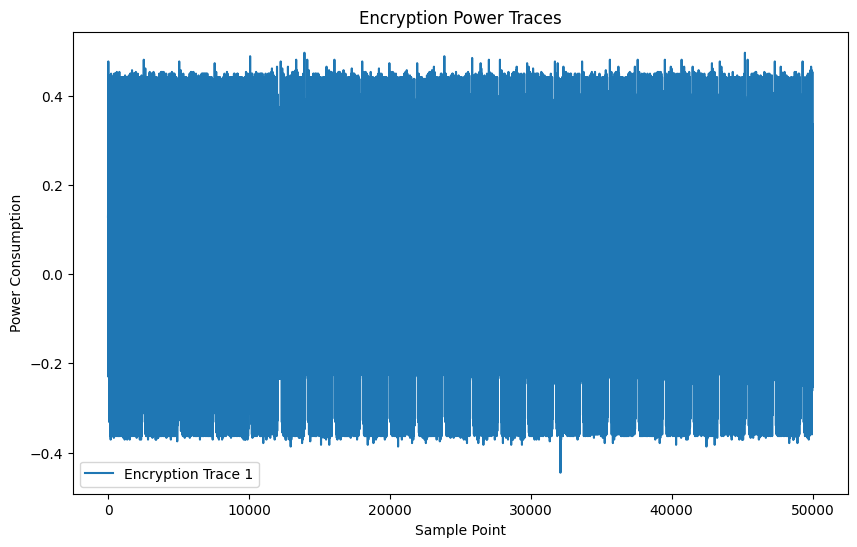

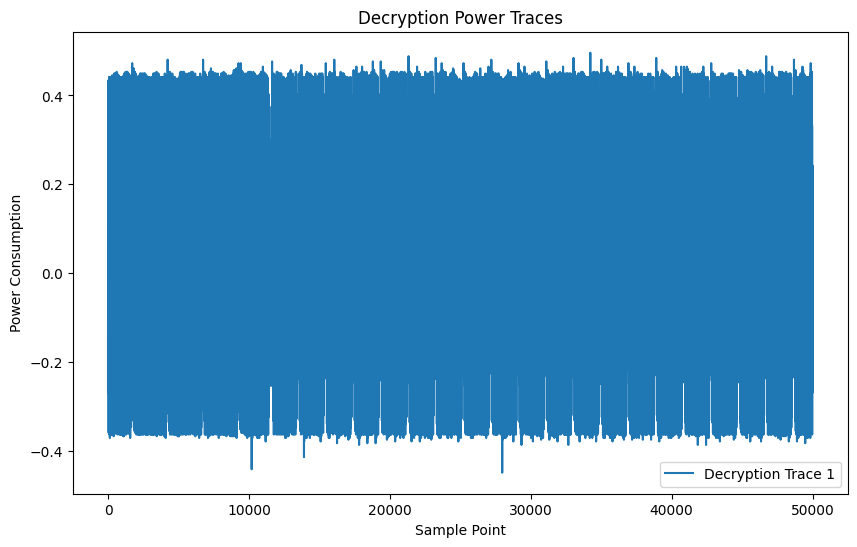

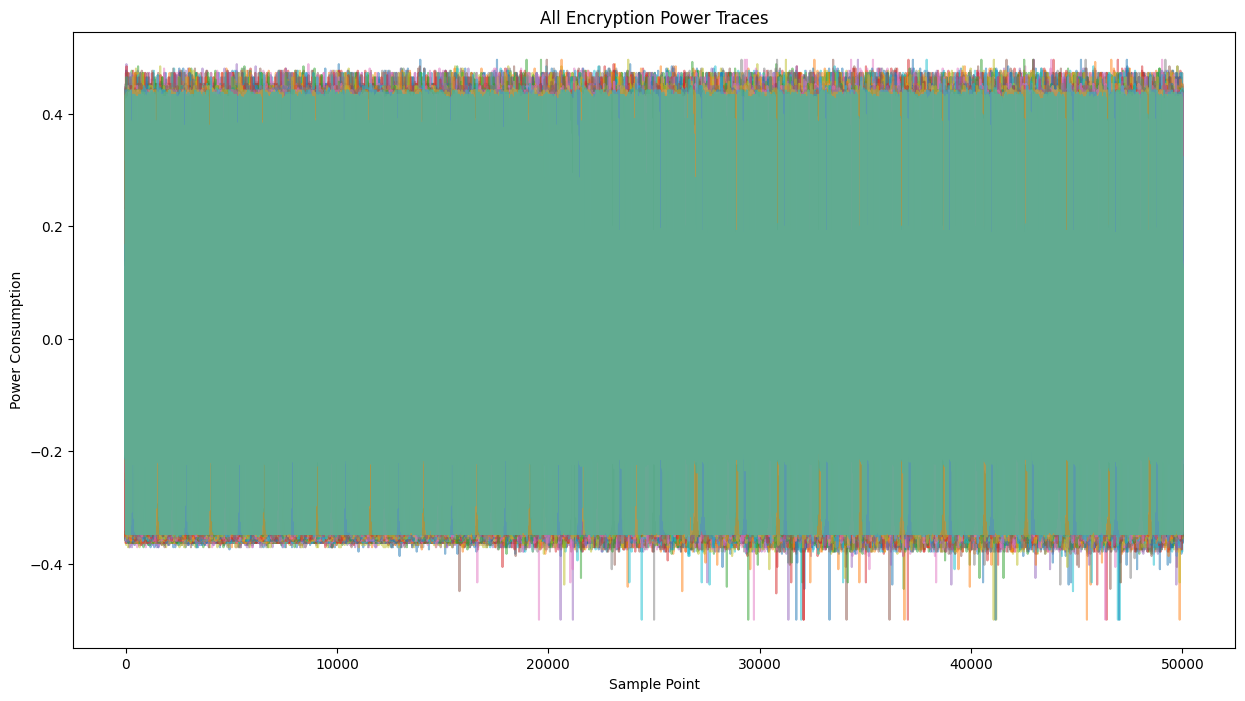

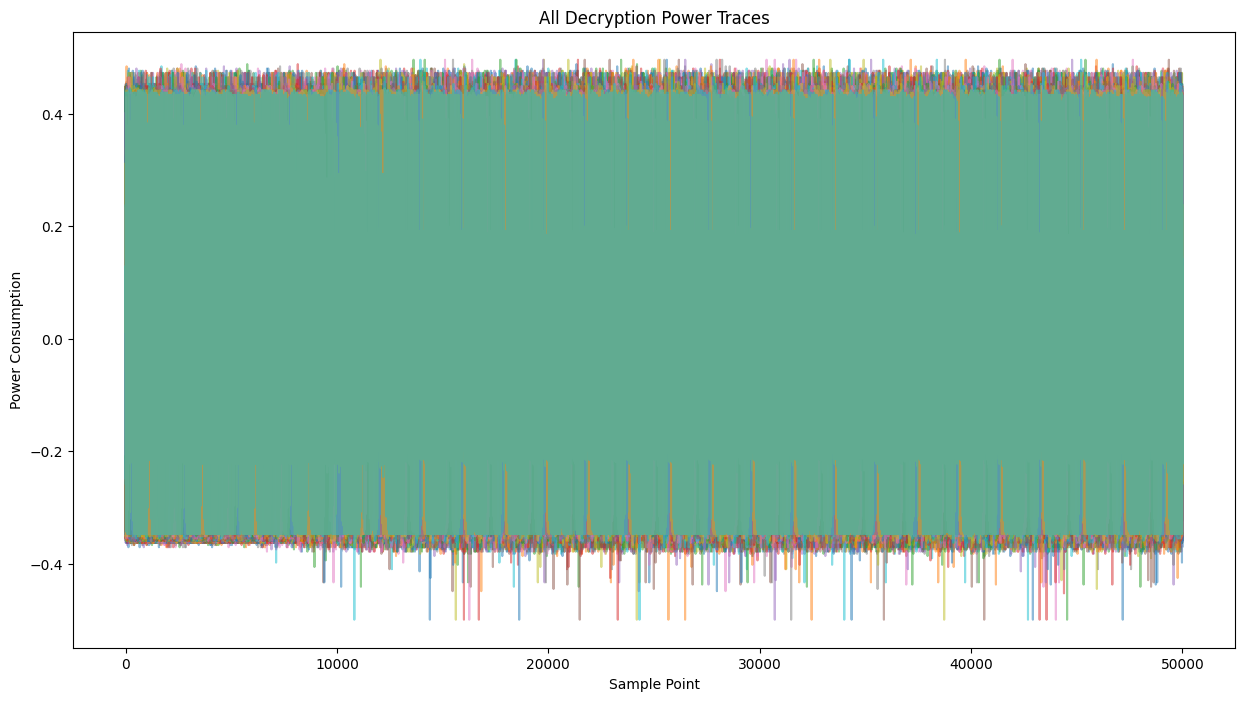

Collected 100 encryption traces.
Collected 100 decryption traces.


In [271]:


import chipwhisperer as cw
import numpy as np
import random
import matplotlib.pyplot as plt



def random_data(size=16):
    
    return bytearray(random.getrandbits(8) for _ in range(size))

def capture_trace(data, operation='p'):
    
    scope.arm()
    target.simpleserial_write(operation, data)
    ret = scope.capture()
    if ret:
        print("Capture failed")
        return None
    else:
        return scope.get_last_trace()

encryption_traces = []
decryption_traces = []

for _ in range(100):
    plaintext = random_data()
    trace = capture_trace(plaintext, 'p')
    if trace is not None:
        encryption_traces.append(trace)
    
    ciphertext = target.simpleserial_read('r', 16)
    trace = capture_trace(ciphertext, 'x')
    if trace is not None:
        decryption_traces.append(trace)

# Plot the first encryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(encryption_traces[:1]):
    plt.plot(trace, label=f'Encryption Trace {i+1}')
plt.title('Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot the first decryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(decryption_traces[:1]):
    plt.plot(trace, label=f'Decryption Trace {i+1}')
plt.title('Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot all encryption traces
plt.figure(figsize=(15, 8))
for trace in encryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()

# Plot all decryption traces
plt.figure(figsize=(15, 8))
for trace in decryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()



print(f"Collected {len(encryption_traces)} encryption traces.")
print(f"Collected {len(decryption_traces)} decryption traces.")


In [248]:

import numpy as np


voltage_traces = np.array(encryption_traces) # Replace this with your actual voltage traces
R = 51  # Resistance in ohms

# Calculate power in terms of V^2/R for each trace
power_traces = (voltage_traces ** 2) / R

# Use cumsum to calculate cumulative power consumption over time
cumulative_power_consumption = np.cumsum(power_traces)

total_power_consumption = cumulative_power_consumption[-1] 

# Print results
#print("Power traces in terms of V^2/R:", power_traces)
#print("Cumulative power consumption over time:", cumulative_power_consumption)
print("Total power consumption:", total_power_consumption)



# Example data and resistance
voltage_traces_dec = np.array(decryption_traces) 
R = 51  # Resistance in ohms, 

# Calculate power in terms of V^2/R for each trace
power_traces_dec = (voltage_traces_dec ** 2) / R


cumulative_power_consumption_dec = np.cumsum(power_traces_dec)


total_power_consumption_dec = cumulative_power_consumption_dec[-1]  


print("Total power consumption dec:", total_power_consumption_dec)

# Convert lists to numpy arrays for easier manipulation
total_power_enc_array = np.array(power_traces)
total_power_dec_array = np.array(power_traces_dec)
print(total_power_consumption)

# Calculate the standard deviation
std_dev_enc = np.std(total_power_enc_array)
std_dev_dec = np.std(total_power_dec_array)

# Print the standard deviations
print(f"Standard Deviation of Encryption Energy Consumption: {std_dev_enc} Watts")
print(f"Standard Deviation of Decryption Energy Consumption: {std_dev_dec} Watts")

Total power consumption: 2699.644920231739
Total power consumption dec: 2683.8923214479228
2699.644920231739
Standard Deviation of Encryption Energy Consumption: 0.0 Watts
Standard Deviation of Decryption Energy Consumption: 0.0 Watts


In [249]:
dt = 0.001  # Time interval in seconds

# Convert total power consumption to millijoules (mJ)
total_energy_consumption_mJ = total_power_consumption * dt / 1000
total_energy_consumption_dec_mJ = total_power_consumption_dec * dt / 1000

# Print results in millijoules
print("Total energy consumption:", total_energy_consumption_mJ, "mJ")
print("Total energy consumption dec:", total_energy_consumption_dec_mJ, "mJ")

Total energy consumption: 0.002699644920231739 mJ
Total energy consumption dec: 0.0026838923214479228 mJ


In [ ]:


import chipwhisperer as cw
import numpy as np
import random
import matplotlib.pyplot as plt



def random_data(size=16):
    
    return bytearray(random.getrandbits(8) for _ in range(size))

def capture_trace(data, operation='p'):
    
    scope.arm()
    target.simpleserial_write(operation, data)
    ret = scope.capture()
    if ret:
        print("Capture failed")
        return None
    else:
        return scope.get_last_trace()

encryption_traces = []
decryption_traces = []

for _ in range(100):
    plaintext = random_data()
    trace = capture_trace(plaintext, 'p')
    if trace is not None:
        encryption_traces.append(trace)
    
    ciphertext = target.simpleserial_read('r', 16)
    trace = capture_trace(ciphertext, 'x')
    if trace is not None:
        decryption_traces.append(trace)

# Plot the first encryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(encryption_traces[:1]):
    plt.plot(trace, label=f'Encryption Trace {i+1}')
plt.title('Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot the first decryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(decryption_traces[:1]):
    plt.plot(trace, label=f'Decryption Trace {i+1}')
plt.title('Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot all encryption traces
plt.figure(figsize=(15, 8))
for trace in encryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()

# Plot all decryption traces
plt.figure(figsize=(15, 8))
for trace in decryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()



print(f"Collected {len(encryption_traces)} encryption traces.")
print(f"Collected {len(decryption_traces)} decryption traces.")


In [218]:

import numpy as np


voltage_traces = np.array(encryption_traces) # Replace this with your actual voltage traces
R = 51  # Resistance in ohms

# Calculate power in terms of V^2/R for each trace
power_traces = (voltage_traces ** 2) / R

# Use cumsum to calculate cumulative power consumption over time
cumulative_power_consumption = np.cumsum(power_traces)

total_power_consumption = cumulative_power_consumption[-1] 

# Print results
#print("Power traces in terms of V^2/R:", power_traces)
#print("Cumulative power consumption over time:", cumulative_power_consumption)
print("Total power consumption:", total_power_consumption)



# Example data and resistance
voltage_traces_dec = np.array(decryption_traces) 
R = 51  # Resistance in ohms, 

# Calculate power in terms of V^2/R for each trace
power_traces_dec = (voltage_traces_dec ** 2) / R


cumulative_power_consumption_dec = np.cumsum(power_traces_dec)


total_power_consumption_dec = cumulative_power_consumption_dec[-1]  


print("Total power consumption dec:", total_power_consumption_dec)

# Convert lists to numpy arrays for easier manipulation
total_power_enc_array = np.array(power_traces)
total_power_dec_array = np.array(power_traces_dec)
print(total_power_consumption)

# Calculate the standard deviation
std_dev_enc = np.std(total_power_enc_array)
std_dev_dec = np.std(total_power_dec_array)

# Print the standard deviations
print(f"Standard Deviation of Encryption Energy Consumption: {std_dev_enc} Watts")
print(f"Standard Deviation of Decryption Energy Consumption: {std_dev_dec} Watts")

Total power consumption: 1025.7287526048221
Total power consumption dec: 1018.9243137335626
1025.7287526048221
Standard Deviation of Encryption Energy Consumption: 0.0 Watts
Standard Deviation of Decryption Energy Consumption: 0.0 Watts


In [219]:
dt = 0.001  # Time interval in seconds

# Convert total power consumption to millijoules (mJ)
total_energy_consumption_mJ = total_power_consumption * dt / 1000
total_energy_consumption_dec_mJ = total_power_consumption_dec * dt / 1000

# Print results in millijoules
print("Total energy consumption:", total_energy_consumption_mJ, "mJ")
print("Total energy consumption dec:", total_energy_consumption_dec_mJ, "mJ")

Total energy consumption: 0.0010257287526048223 mJ
Total energy consumption dec: 0.0010189243137335626 mJ


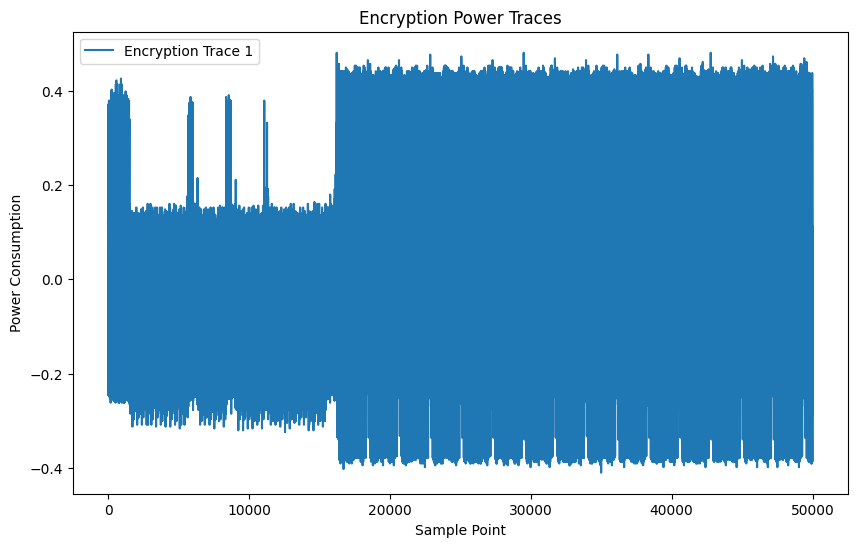

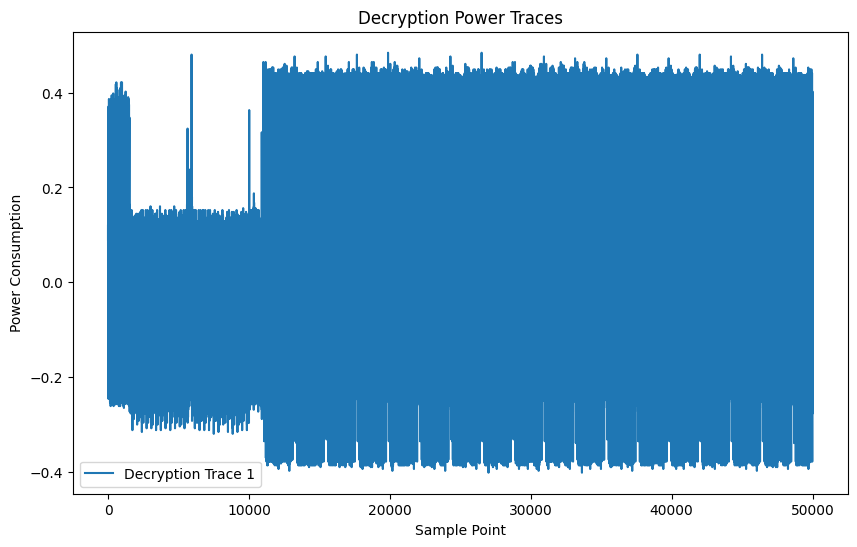

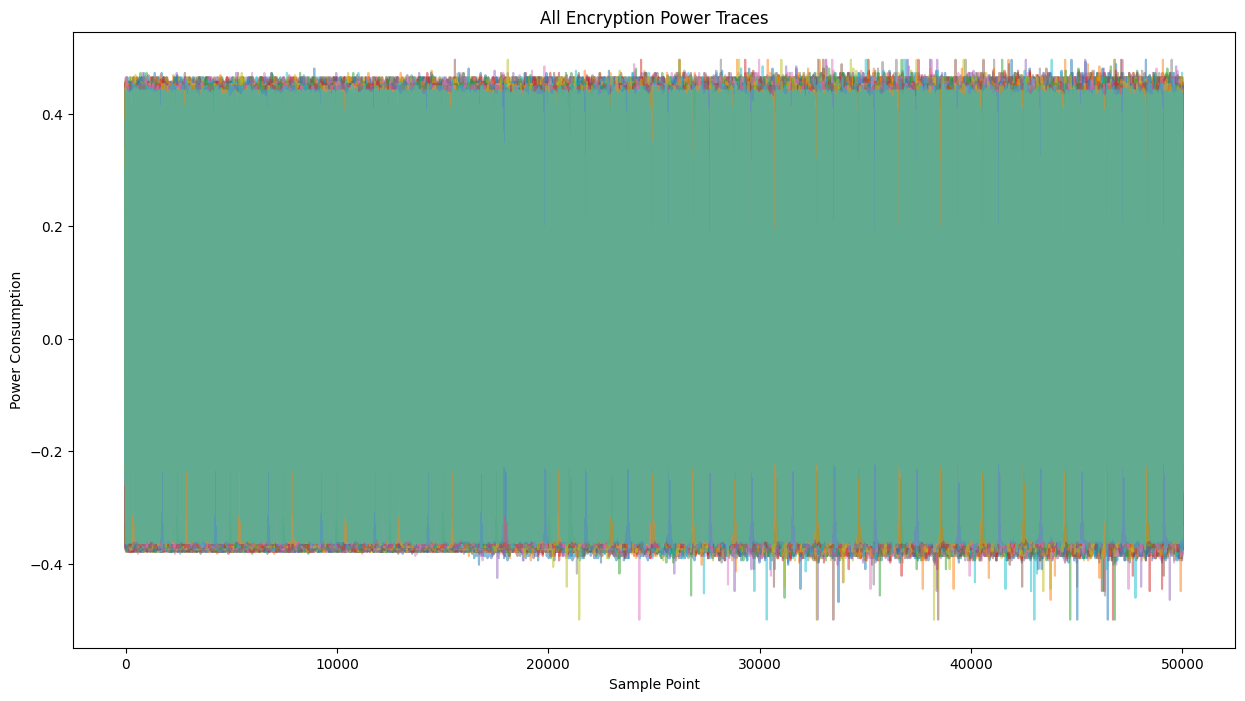

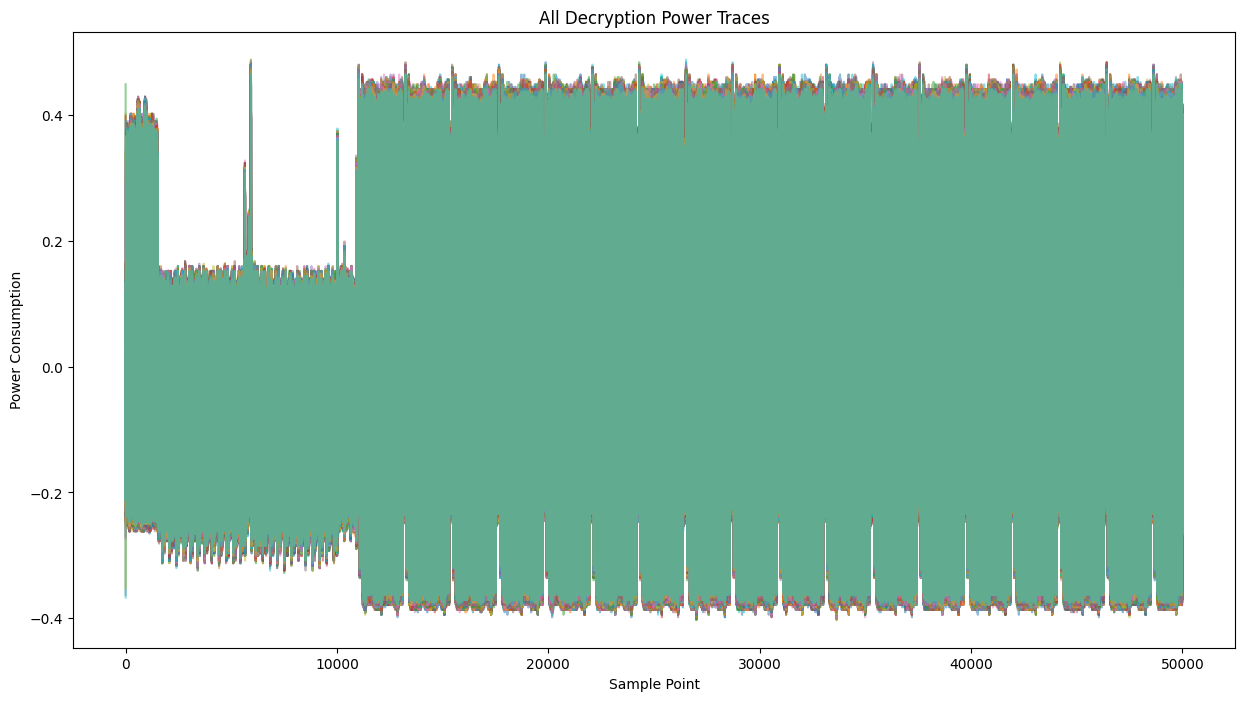

Collected 100 encryption traces.
Collected 100 decryption traces.


In [295]:


import chipwhisperer as cw
import numpy as np
import random
import matplotlib.pyplot as plt



def random_data(size=16):
    
    return bytearray(random.getrandbits(8) for _ in range(size))

def capture_trace(data, operation='p'):
    
    scope.arm()
    target.simpleserial_write(operation, data)
    ret = scope.capture()
    if ret:
        print("Capture failed")
        return None
    else:
        return scope.get_last_trace()

encryption_traces = []
decryption_traces = []

for _ in range(100):
    plaintext = random_data()
    trace = capture_trace(plaintext, 'p')
    if trace is not None:
        encryption_traces.append(trace)
    
    ciphertext = target.simpleserial_read('r', 16)
    trace = capture_trace(ciphertext, 'x')
    if trace is not None:
        decryption_traces.append(trace)

# Plot the first encryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(encryption_traces[:1]):
    plt.plot(trace, label=f'Encryption Trace {i+1}')
plt.title('Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot the first decryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(decryption_traces[:1]):
    plt.plot(trace, label=f'Decryption Trace {i+1}')
plt.title('Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot all encryption traces
plt.figure(figsize=(15, 8))
for trace in encryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()

# Plot all decryption traces
plt.figure(figsize=(15, 8))
for trace in decryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()



print(f"Collected {len(encryption_traces)} encryption traces.")
print(f"Collected {len(decryption_traces)} decryption traces.")


In [296]:

import numpy as np


voltage_traces = np.array(encryption_traces) # Replace this with your actual voltage traces
R = 51  # Resistance in ohms

# Calculate power in terms of V^2/R for each trace
power_traces = (voltage_traces ** 2) / R

# Use cumsum to calculate cumulative power consumption over time
cumulative_power_consumption = np.cumsum(power_traces)

total_power_consumption = cumulative_power_consumption[-1] 

# Print results
#print("Power traces in terms of V^2/R:", power_traces)
#print("Cumulative power consumption over time:", cumulative_power_consumption)
print("Total power consumption:", total_power_consumption)



# Example data and resistance
voltage_traces_dec = np.array(decryption_traces) 
R = 51  # Resistance in ohms, 

# Calculate power in terms of V^2/R for each trace
power_traces_dec = (voltage_traces_dec ** 2) / R


cumulative_power_consumption_dec = np.cumsum(power_traces_dec)


total_power_consumption_dec = cumulative_power_consumption_dec[-1]  


print("Total power consumption dec:", total_power_consumption_dec)

# Convert lists to numpy arrays for easier manipulation
total_power_enc_array = np.array(power_traces)
total_power_dec_array = np.array(power_traces_dec)
print(total_power_consumption)

# Calculate the standard deviation
std_dev_enc = np.std(total_power_enc_array)
std_dev_dec = np.std(total_power_dec_array)

# Print the standard deviations
print(f"Standard Deviation of Encryption Energy Consumption: {std_dev_enc} Watts")
print(f"Standard Deviation of Decryption Energy Consumption: {std_dev_dec} Watts")

Total power consumption: 3144.980859835643
Total power consumption dec: 2833.9954313547955
3144.980859835643
Standard Deviation of Encryption Energy Consumption: 0.0 Watts
Standard Deviation of Decryption Energy Consumption: 0.0 Watts


In [297]:
dt = 0.001  # Time interval in seconds

# Convert total power consumption to millijoules (mJ)
total_energy_consumption_mJ = total_power_consumption * dt / 1000
total_energy_consumption_dec_mJ = total_power_consumption_dec * dt / 1000

# Print results in millijoules
print("Total energy consumption:", total_energy_consumption_mJ, "mJ")
print("Total energy consumption dec:", total_energy_consumption_dec_mJ, "mJ")

Total energy consumption: 0.003144980859835643 mJ
Total energy consumption dec: 0.002833995431354796 mJ


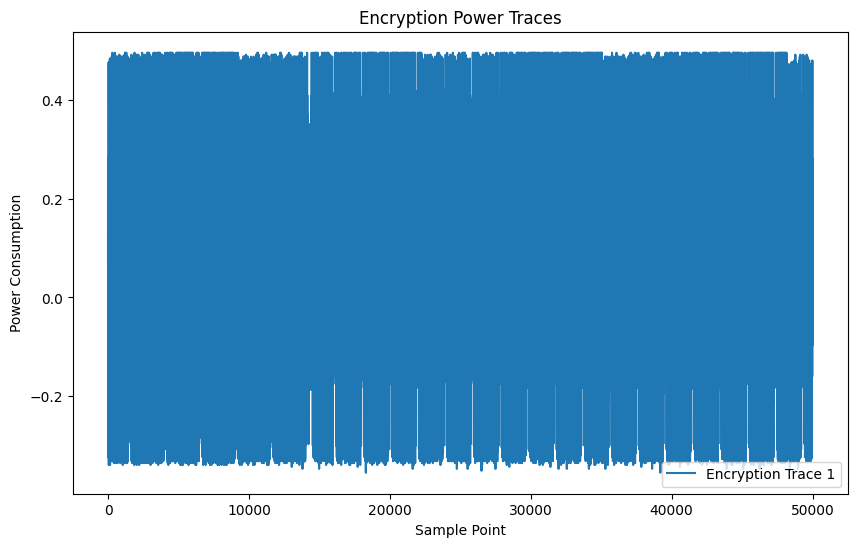

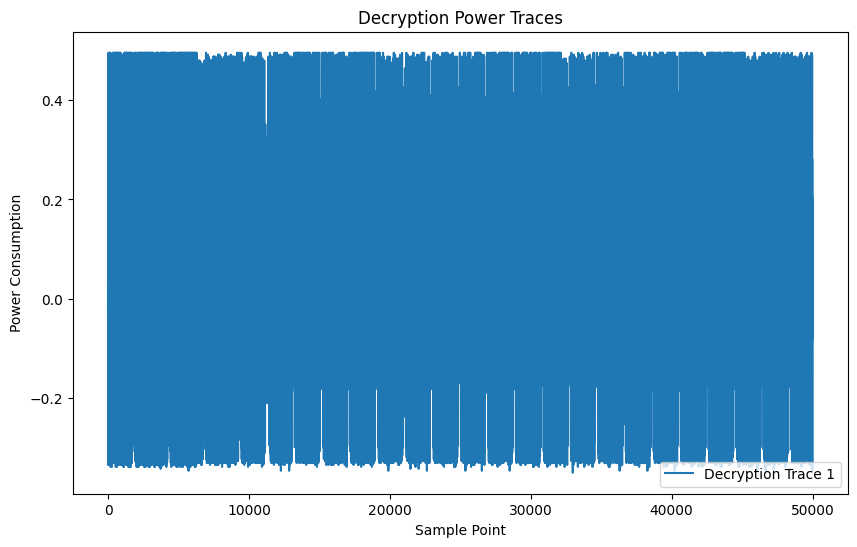

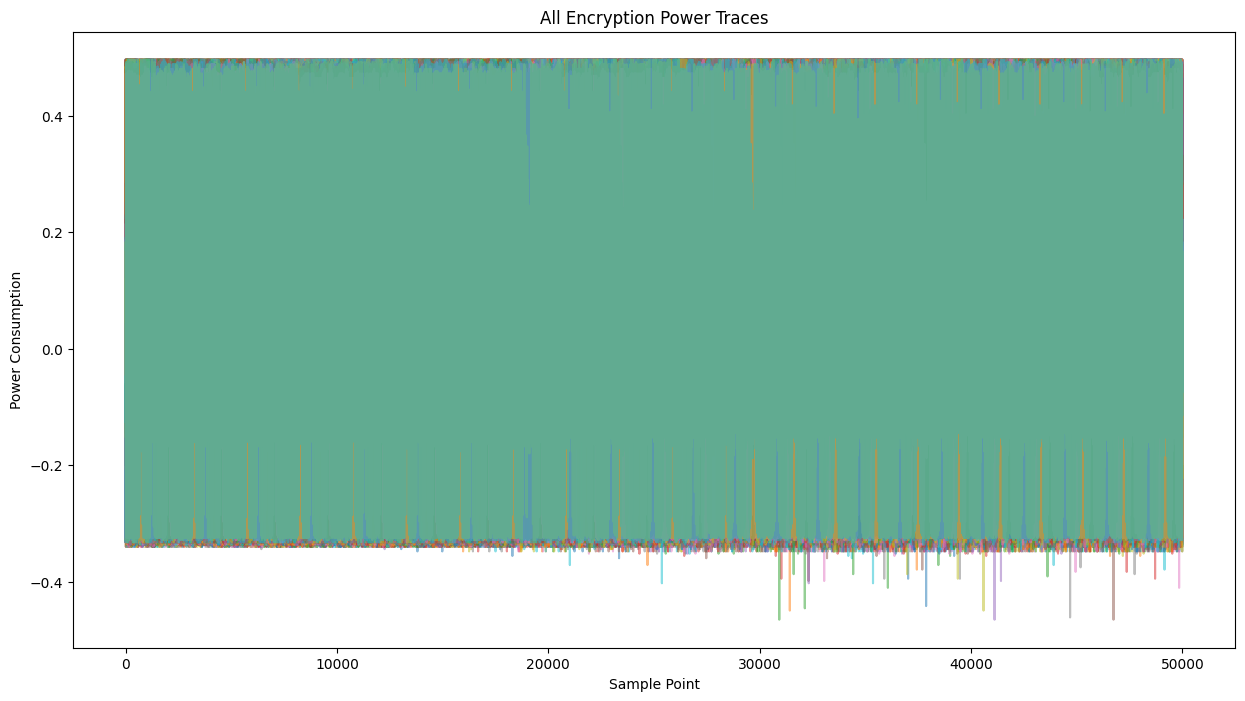

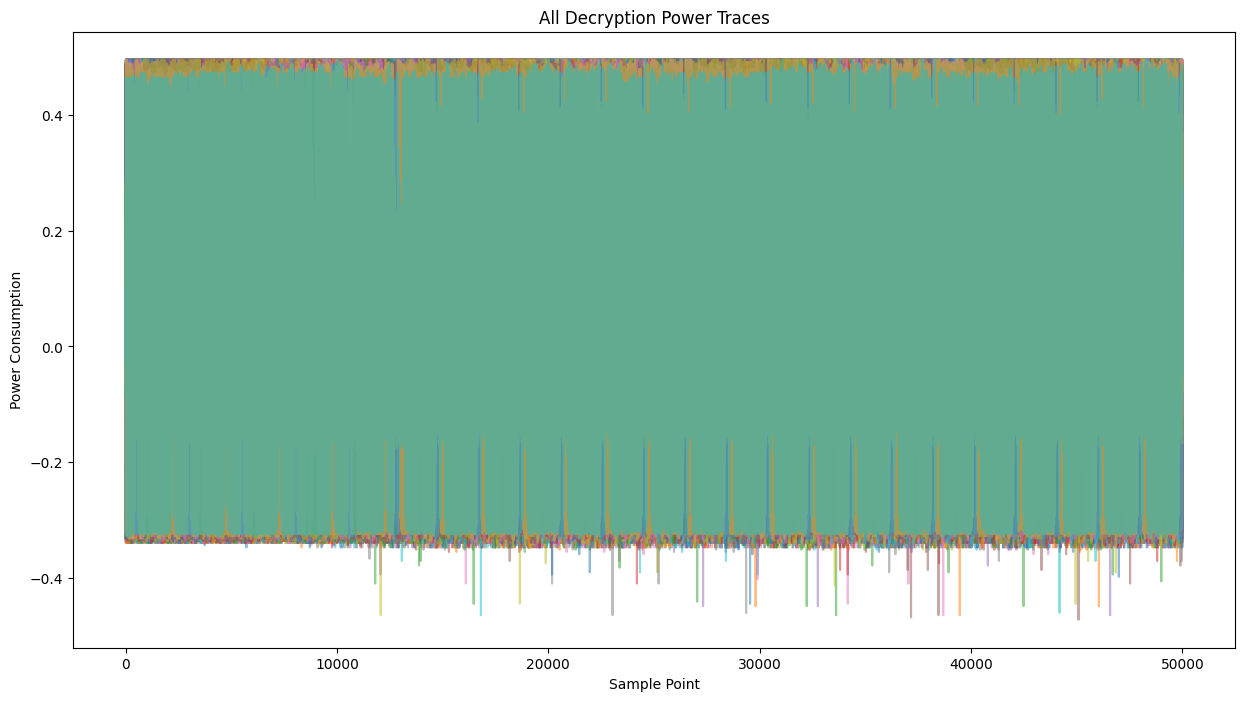

Collected 100 encryption traces.
Collected 100 decryption traces.


In [368]:


import chipwhisperer as cw
import numpy as np
import random
import matplotlib.pyplot as plt



def random_data(size=16):
    
    return bytearray(random.getrandbits(8) for _ in range(size))

def capture_trace(data, operation='p'):
    
    scope.arm()
    target.simpleserial_write(operation, data)
    ret = scope.capture()
    if ret:
        print("Capture failed")
        return None
    else:
        return scope.get_last_trace()

encryption_traces = []
decryption_traces = []

for _ in range(100):
    plaintext = random_data()
    trace = capture_trace(plaintext, 'p')
    if trace is not None:
        encryption_traces.append(trace)
    
    ciphertext = target.simpleserial_read('r', 16)
    trace = capture_trace(ciphertext, 'x')
    if trace is not None:
        decryption_traces.append(trace)

# Plot the first encryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(encryption_traces[:1]):
    plt.plot(trace, label=f'Encryption Trace {i+1}')
plt.title('Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot the first decryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(decryption_traces[:1]):
    plt.plot(trace, label=f'Decryption Trace {i+1}')
plt.title('Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot all encryption traces
plt.figure(figsize=(15, 8))
for trace in encryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()

# Plot all decryption traces
plt.figure(figsize=(15, 8))
for trace in decryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()



print(f"Collected {len(encryption_traces)} encryption traces.")
print(f"Collected {len(decryption_traces)} decryption traces.")


In [369]:

import numpy as np


voltage_traces = np.array(encryption_traces) # Replace this with your actual voltage traces
R = 51  # Resistance in ohms

# Calculate power in terms of V^2/R for each trace
power_traces = (voltage_traces ** 2) / R

# Use cumsum to calculate cumulative power consumption over time
cumulative_power_consumption = np.cumsum(power_traces)

total_power_consumption = cumulative_power_consumption[-1] 

# Print results
#print("Power traces in terms of V^2/R:", power_traces)
#print("Cumulative power consumption over time:", cumulative_power_consumption)
print("Total power consumption:", total_power_consumption)



# Example data and resistance
voltage_traces_dec = np.array(decryption_traces) 
R = 51  # Resistance in ohms, 

# Calculate power in terms of V^2/R for each trace
power_traces_dec = (voltage_traces_dec ** 2) / R


cumulative_power_consumption_dec = np.cumsum(power_traces_dec)


total_power_consumption_dec = cumulative_power_consumption_dec[-1]  


print("Total power consumption dec:", total_power_consumption_dec)

# Convert lists to numpy arrays for easier manipulation
total_power_enc_array = np.array(power_traces)
total_power_dec_array = np.array(power_traces_dec)
print(total_power_consumption)

# Calculate the standard deviation
std_dev_enc = np.std(total_power_enc_array)
std_dev_dec = np.std(total_power_dec_array)

# Print the standard deviations
print(f"Standard Deviation of Encryption Energy Consumption: {std_dev_enc} Watts")
print(f"Standard Deviation of Decryption Energy Consumption: {std_dev_dec} Watts")

Total power consumption: 2160.25357562242
Total power consumption dec: 2142.5365211406406
2160.25357562242
Standard Deviation of Encryption Energy Consumption: 0.0 Watts
Standard Deviation of Decryption Energy Consumption: 0.0 Watts


In [370]:
dt = 0.001  # Time interval in seconds

# Convert total power consumption to millijoules (mJ)
total_energy_consumption_mJ = total_power_consumption * dt / 1000
total_energy_consumption_dec_mJ = total_power_consumption_dec * dt / 1000

# Print results in millijoules
print("Total energy consumption:", total_energy_consumption_mJ, "mJ")
print("Total energy consumption dec:", total_energy_consumption_dec_mJ, "mJ")

Total energy consumption: 0.0021602535756224204 mJ
Total energy consumption dec: 0.0021425365211406406 mJ


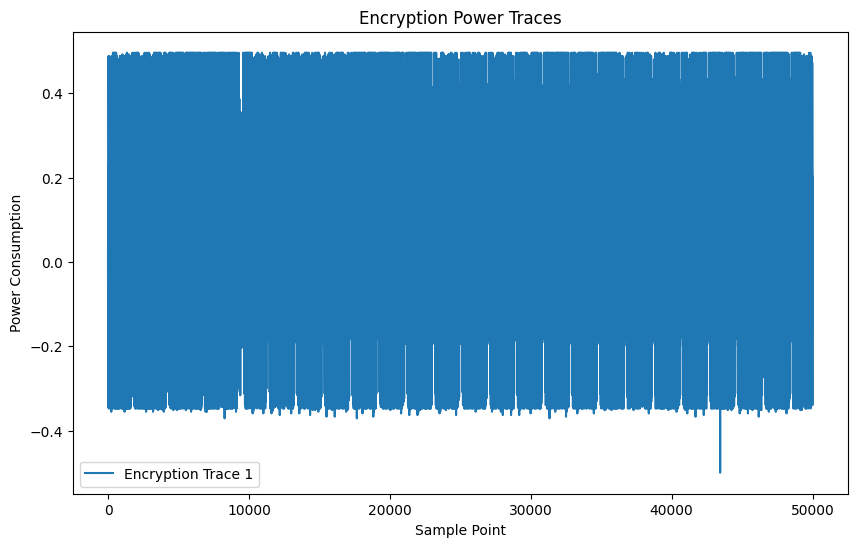

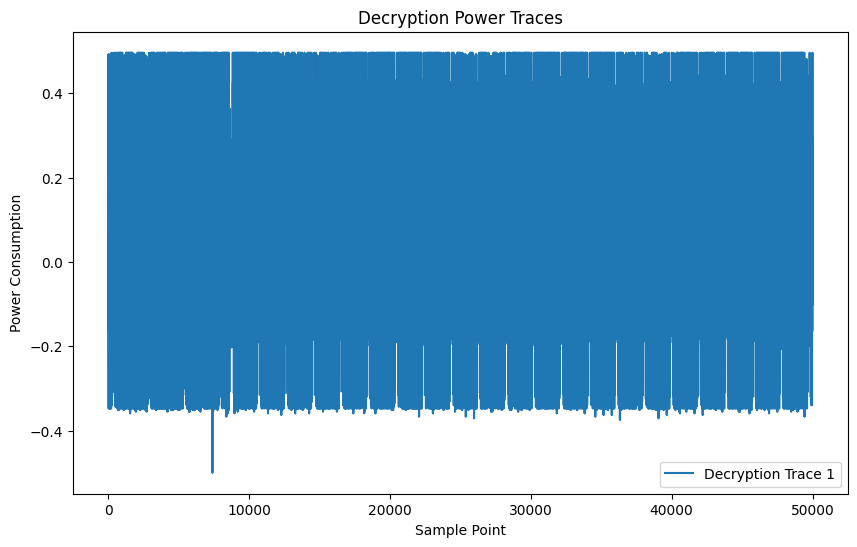

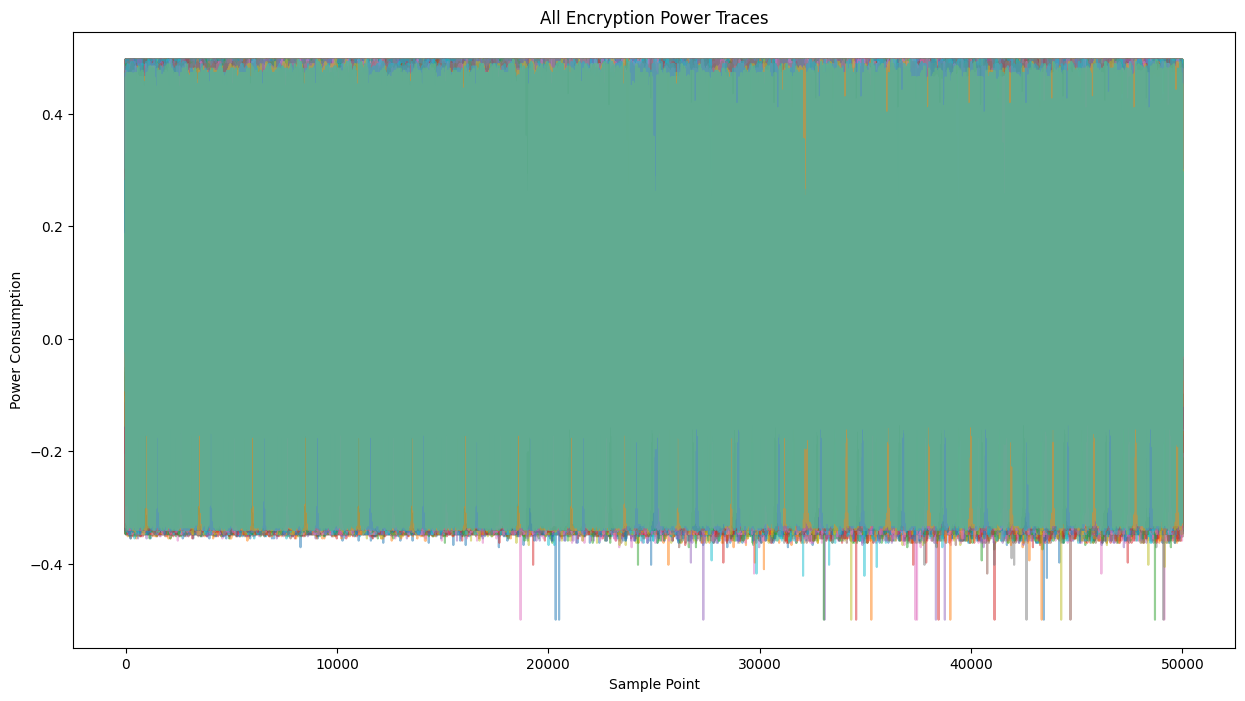

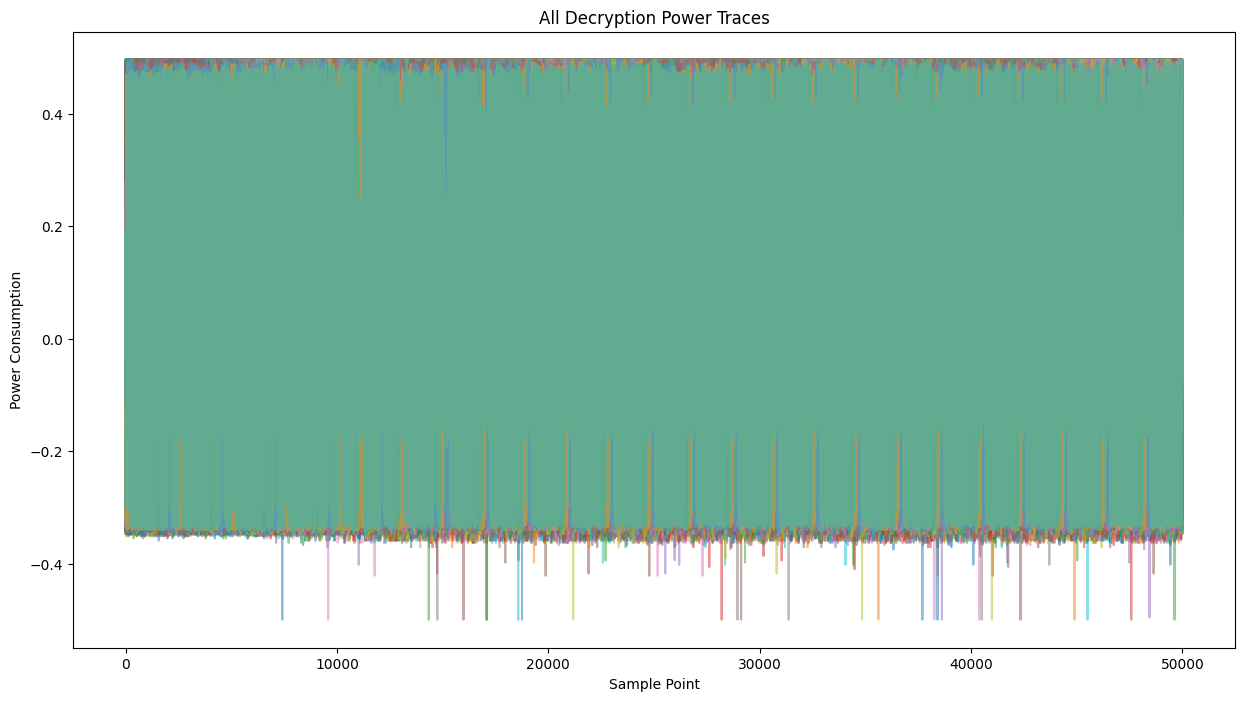

Collected 100 encryption traces.
Collected 100 decryption traces.


In [392]:


import chipwhisperer as cw
import numpy as np
import random
import matplotlib.pyplot as plt



def random_data(size=16):
    
    return bytearray(random.getrandbits(8) for _ in range(size))

def capture_trace(data, operation='p'):
    
    scope.arm()
    target.simpleserial_write(operation, data)
    ret = scope.capture()
    if ret:
        print("Capture failed")
        return None
    else:
        return scope.get_last_trace()

encryption_traces = []
decryption_traces = []

for _ in range(100):
    plaintext = random_data()
    trace = capture_trace(plaintext, 'p')
    if trace is not None:
        encryption_traces.append(trace)
    
    ciphertext = target.simpleserial_read('r', 16)
    trace = capture_trace(ciphertext, 'x')
    if trace is not None:
        decryption_traces.append(trace)

# Plot the first encryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(encryption_traces[:1]):
    plt.plot(trace, label=f'Encryption Trace {i+1}')
plt.title('Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot the first decryption traces
plt.figure(figsize=(10, 6))
for i, trace in enumerate(decryption_traces[:1]):
    plt.plot(trace, label=f'Decryption Trace {i+1}')
plt.title('Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

# Plot all encryption traces
plt.figure(figsize=(15, 8))
for trace in encryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Encryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()

# Plot all decryption traces
plt.figure(figsize=(15, 8))
for trace in decryption_traces:
    plt.plot(trace, alpha=0.5)  # Reduced alpha to make overlapping lines more visible
plt.title('All Decryption Power Traces')
plt.xlabel('Sample Point')
plt.ylabel('Power Consumption')
plt.show()



print(f"Collected {len(encryption_traces)} encryption traces.")
print(f"Collected {len(decryption_traces)} decryption traces.")


In [393]:

import numpy as np


voltage_traces = np.array(encryption_traces) # Replace this with your actual voltage traces
R = 51  # Resistance in ohms

# Calculate power in terms of V^2/R for each trace
power_traces = (voltage_traces ** 2) / R

# Use cumsum to calculate cumulative power consumption over time
cumulative_power_consumption = np.cumsum(power_traces)

total_power_consumption = cumulative_power_consumption[-1] 

# Print results
#print("Power traces in terms of V^2/R:", power_traces)
#print("Cumulative power consumption over time:", cumulative_power_consumption)
print("Total power consumption:", total_power_consumption)



# Example data and resistance
voltage_traces_dec = np.array(decryption_traces) 
R = 51  # Resistance in ohms, 

# Calculate power in terms of V^2/R for each trace
power_traces_dec = (voltage_traces_dec ** 2) / R


cumulative_power_consumption_dec = np.cumsum(power_traces_dec)


total_power_consumption_dec = cumulative_power_consumption_dec[-1]  


print("Total power consumption dec:", total_power_consumption_dec)

# Convert lists to numpy arrays for easier manipulation
total_power_enc_array = np.array(power_traces)
total_power_dec_array = np.array(power_traces_dec)
print(total_power_consumption)

# Calculate the standard deviation
std_dev_enc = np.std(total_power_enc_array)
std_dev_dec = np.std(total_power_dec_array)

# Print the standard deviations
print(f"Standard Deviation of Encryption Energy Consumption: {std_dev_enc} Watts")
print(f"Standard Deviation of Decryption Energy Consumption: {std_dev_dec} Watts")

Total power consumption: 2260.529260365431
Total power consumption dec: 2242.2320792895994
2260.529260365431
Standard Deviation of Encryption Energy Consumption: 0.0 Watts
Standard Deviation of Decryption Energy Consumption: 0.0 Watts


In [346]:
dt = 0.001  # Time interval in seconds

# Convert total power consumption to millijoules (mJ)
total_energy_consumption_mJ = total_power_consumption * dt / 1000
total_energy_consumption_dec_mJ = total_power_consumption_dec * dt / 1000

# Print results in millijoules
print("Total energy consumption:", total_energy_consumption_mJ, "mJ")
print("Total energy consumption dec:", total_energy_consumption_dec_mJ, "mJ")

Total energy consumption: 0.0027792881078101106 mJ
Total energy consumption dec: 0.0027620373553399516 mJ


In [397]:
old_power_consumption_enc = 0.003144980859835643
new_power_consumption_enc = 0.0021602535756224204 

percentage_change_enc = ((old_power_consumption_enc - new_power_consumption_enc) / old_power_consumption_enc) * 100

print("percentage change in encrption : ",percentage_change_enc)

old_power_consumption_dec = 0.002833995431354796
new_power_consumption_dec = 0.0021425365211406406 

percentage_change_dec = ((old_power_consumption_dec - new_power_consumption_dec) / old_power_consumption_dec) * 100

print("percentage change in decryption : ",percentage_change_dec)



percentage change in encrption :  31.311073996955415
percentage change in decryption :  24.398730589470365


In [398]:
scope.dis()
target.dis()